# Project 1

In [1]:
# importing necessary modules
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score #model evaluation
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

from sklearn.preprocessing import LabelBinarizer


import matplotlib.pyplot as plt

## Part 1

In [2]:
# importing the dataset
StrokeDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")
StrokeDF.head(15)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0
5,77.0,0.0,0.0,1.0,1.0,99.78,29.5,0,0,0,1.0,1.0,9.0,194.88,59.609789,16.0
6,56.0,0.0,0.0,1.0,0.0,156.18,25.8,0,0,0,1.0,1.0,9.0,152.46,44.576538,6.0
7,53.0,0.0,0.0,1.0,1.0,126.35,24.9,0,0,0,0.0,0.0,10.0,148.59,104.157182,6.0
8,37.0,0.0,0.0,1.0,0.0,74.29,24.6,0,1,0,1.0,0.0,9.0,95.47,53.331891,8.0
9,39.0,0.0,0.0,1.0,0.0,73.07,33.4,0,0,0,1.0,0.0,6.0,179.83,89.013600,13.0


### 1

In [3]:
# Count the missing data per column
StrokeDF.isnull().sum()

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64

In [4]:
# Remove rows with missing data (if any).
StrokeDF = StrokeDF.dropna()
# StrokeDF.isnull().sum()

### 2

In [5]:
# creating X and y for logistic regression model
predictors = ["reg_to_vote","age","hypertension","heart_disease","ever_married","Residence_type","avg_glucose_level","bmi","smoking_status_smokes","smoking_status_formerly","dog_owner","income_in_k","er_visits","raccoons_to_fight","fast_food_budget_month"]
continuous_predictors = ["age","avg_glucose_level","bmi","income_in_k","er_visits","raccoons_to_fight","fast_food_budget_month"]
outcome = ["stroke"]

In [6]:
z = StandardScaler()

StrokeDF[continuous_predictors] = z.fit_transform(StrokeDF[continuous_predictors])


X = StrokeDF[predictors]
y = StrokeDF[outcome]

# X.head()
# y.head()
StrokeDF

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,0.755732,1.0,0.0,0.0,1.0,-0.726799,-0.460635,0,1,0,1.0,1.0,0.012965,0.248335,-0.752599,-0.021923
1,-1.706986,0.0,0.0,0.0,0.0,0.096425,-1.481171,0,0,0,0.0,1.0,0.756460,-0.548153,-1.000959,-0.865736
2,1.503343,0.0,0.0,1.0,1.0,-0.829175,-0.133055,0,0,0,0.0,1.0,-0.978362,0.341052,0.996989,-0.232876
3,-0.255741,0.0,0.0,1.0,1.0,-0.237518,0.156726,0,0,0,1.0,1.0,0.508628,-0.902472,0.563086,-0.232876
4,0.052098,0.0,0.0,0.0,0.0,-0.044731,1.517441,0,1,0,1.0,1.0,0.260797,1.516195,0.186230,0.399983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.403915,1.0,0.0,0.0,1.0,0.009338,0.018135,0,0,0,0.0,0.0,-2.217521,-0.467604,0.187506,-0.021923
14996,0.579824,0.0,0.0,1.0,1.0,-0.944405,-0.296845,0,0,0,1.0,0.0,1.252124,-1.347562,-0.723219,1.454750
14997,0.755732,1.0,0.0,1.0,0.0,-0.124062,-0.032262,0,0,0,0.0,1.0,1.747787,-3.263709,0.898503,3.142376
14998,1.503343,0.0,0.0,1.0,0.0,-0.350088,0.396111,0,0,0,0.0,0.0,0.260797,0.168759,-0.692470,-0.654783


In [7]:
# Use 10 fold cross validation for your model

# create k-fold object
kf = KFold(n_splits = 10)

#create model
lr = LogisticRegression()

#create empty list to store accuracy for each fold
acc_train = []
acc_test = []

roc_train = []
roc_test = []


# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]
    
    # z score
    z2 = StandardScaler()
    X_train = z2.fit_transform(X_train[continuous_predictors])
    X_test = z2.transform(X_test[continuous_predictors])

    # model
    stroke_model = lr.fit(X_train, y_train)

   
    # record accuracy
    acc_train.append(accuracy_score(y_train, lr.predict(X_train)))
    acc_test.append(accuracy_score(y_test, lr.predict(X_test)))

    roc_train.append(roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))
    roc_test.append(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


    
#print overall acc
print(acc_train)
print(np.mean(acc_train))

print(acc_test)
print(np.mean(acc_test))

print(np.round(roc_train,2))
print(np.mean(roc_train))

print(np.round(roc_test,2))
print(np.mean(roc_test))

[0.9600750058598329, 0.9614813657316977, 0.960859375, 0.959296875, 0.960546875, 0.96015625, 0.960625, 0.96125, 0.959609375, 0.959609375]
0.9603509496591529
[0.9627547434996486, 0.9501054111033029, 0.9563994374120957, 0.9690576652601969, 0.9585091420534458, 0.9627285513361463, 0.9578059071729957, 0.9528832630098453, 0.9662447257383966, 0.9669479606188467]
0.960343680720492
[0.88 0.87 0.88 0.88 0.88 0.87 0.87 0.88 0.88 0.88]
0.8756617773610762
[0.86 0.88 0.85 0.88 0.87 0.91 0.88 0.88 0.87 0.86]
0.87399173684167


#### The model is slightly overfit because both accuracy and roc scores are a bit larger in the train set than in the test set.

### 3

In [8]:
# Fit another logistic regression model on ALL of the data (no model validation; but do z score) using the same predictors as before, and put the coefficients into a dataframe called coef.

lr2 = LogisticRegression()
lr2.fit(X,y)

predictions = lr2.predict(X)
coef = pd.DataFrame({"Coefs": lr2.coef_[0],
                    "Names": predictors})
coef = coef.append({"Coefs": lr2.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
# coef.head(15)

### 4

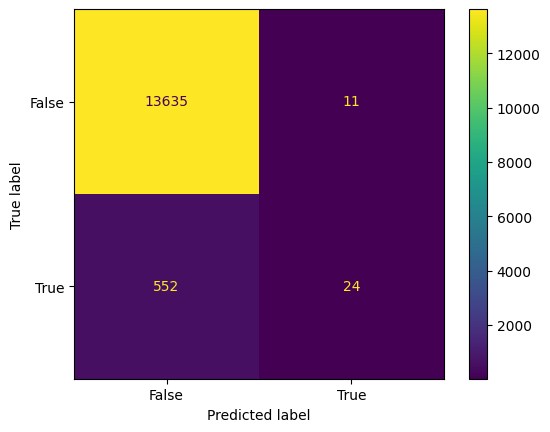

In [9]:
# print out a confusion matrix for the model you made in part 3. Discuss in detail what this confusion matrix tells you about your model and how can you tell.
confusion_matrix = metrics.confusion_matrix(y, lr2.predict(X))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### The confusion matrix tells us that our model does really well predicting  negative values because most of the data predicted to be false actually is false. However, our model does poorly in predicting true values because only about 68.6% of the data that should have been positive was predicted to be positive. Overall, we have a pretty good model with an accuracy of 96%.
#### Accuracy: 96%
#### Sensitivity: 95.8% 
#### Specificity: 99.9%
#### Precision: 68.6%



## Part 2

####The WHO has asked the following five questions, create at least 1 ggplot graph per question (using the above data + model when needed) to help answer each question, and explicitly answer the question in a Markdown cell below your graph. You may use other calculations to help support your answer but MUST pair it with a graph. Write your answer as if you were explaining it to a non-data scientist. You will be graded on the effectiveness and clarity of your graph, as well as the completeness, clarity, and correctness of your responses and justifications.

### 1

In [10]:
# 1.
# In this specific data set, does the group of people who are dog-owners over 50 have a higher average probability of stroke than the group of people who are non-dog owners who currently smoke? 
# How can you tell? 
# (Do NOT use the model for this question, it's asking you to grab the people/rows in each of the two groups and within the group look at the probability of having a stroke).

regular_StrokeDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")
regular_StrokeDF = regular_StrokeDF.dropna()

In [11]:
# grabbing the people who are dog owners and are older than 50 years old.
dog_owner = regular_StrokeDF["dog_owner"] == 1.0
over_50 = regular_StrokeDF["age"] > 50.0

dog_owners_over_50 = dog_owner & over_50

dog_owners_over_50_DF = StrokeDF.loc[dog_owners_over_50]


dog_owners_over_50_rate = ((dog_owners_over_50_DF)["stroke"].sum()) / len(dog_owners_over_50_DF.index)
perc_dog_owners_over_50_stroke_rate = dog_owners_over_50_rate * 100
perc_dog_owners_over_50_stroke_rate

8.617290903970712

In [12]:
# grabbing the people who are not dog owners and currently smoke
not_dog_owner = !(dog_owner)
smoker = StrokeDF["smoking_status_smokes"] == 1.0

not_dog_owner_smoker = not_dog_owner & smoker

not_dog_owner_smoker_DF = StrokeDF.loc[not_dog_owner_smoker]


not_dog_owner_smoker_rate = ((not_dog_owner_smoker_DF)["stroke"].sum()) / len(not_dog_owner_smoker_DF.index)
perc_not_dog_owner_smoker_stroke_rate = not_dog_owner_smoker_rate * 100
perc_not_dog_owner_smoker_stroke_rate

5.360443622920517

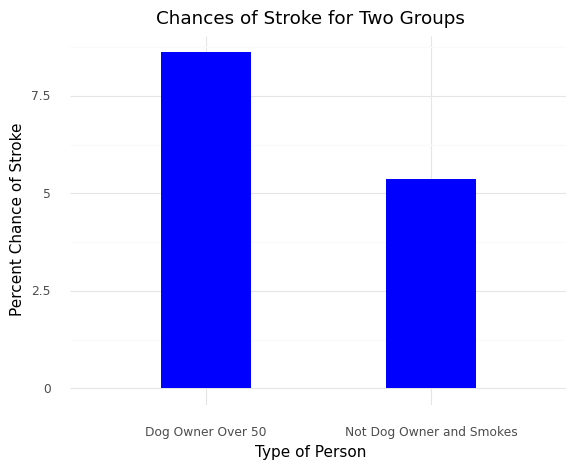

<ggplot: (8759113924900)>

In [13]:
# making new data frame to plot percentages

type_of_person = ["Dog Owner Over 50","Not Dog Owner and Smokes"]
percentages = [perc_dog_owners_over_50_stroke_rate,perc_not_dog_owner_smoker_stroke_rate]

q1_DF = pd.DataFrame({"Type of Person": type_of_person, "Percent Chance of Stroke": percentages})

# q1_DF

ggplot(q1_DF, aes(x = "Type of Person", y = "Percent Chance of Stroke")) + geom_bar(stat = "identity", fill = "blue", width = 0.4) + theme_minimal() + labs(title = "Chances of Stroke for Two Groups")

#### Those who are dog owners and are over 50 years old are about 1.5 times more likely to have a stroke than non-dog owners who smoke.
#### We know this because when we can compare the relative percentages for stroke chances in each group, the first group has a higher chance of stroke.

### 2

In [14]:
# 2.
# What is the relationship between average blood glucose and BMI? 
# Is the relationship between those two variables different for people who have been married and those that have not been married? 
# How can you tell?

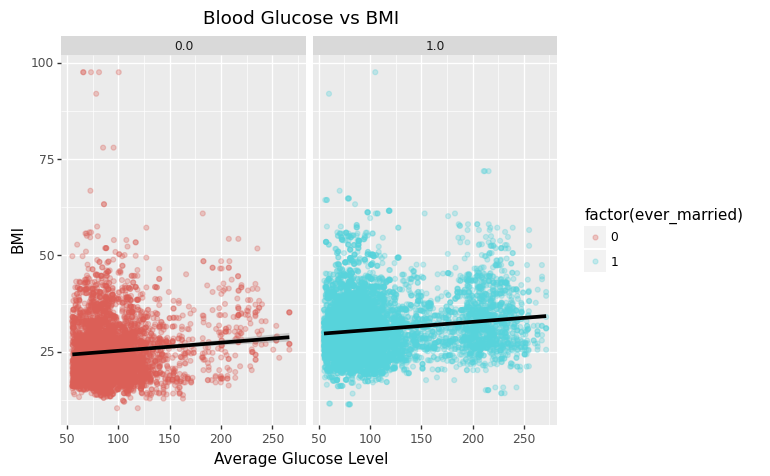

<ggplot: (8759113850932)>

In [15]:
(ggplot(regular_StrokeDF, aes(x = "avg_glucose_level", y = "bmi", color = "factor(ever_married)")) +
 geom_point(alpha = 0.3) +
 stat_smooth(method = "lm", color = "black", size = 1.5) +
 facet_wrap("~ever_married") +
 labs(title = "Blood Glucose vs BMI", x = "Average Glucose Level", y = "BMI"))


#### On the left, we compare the average glucose level and bmi for those who have never been married, and on the right we compare the same variables but for those who are (or have been) married. 
#### There is a slight positive relationship between average blood glucose level and bmi. 
#### The relationship is almost the exact same between those who are married and those who are not.

### 3

In [16]:
# 3.
# Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 90k? 
# Discuss the potential accuracy and ethical implications if your model were more accurate for different groups 
# You can use the full model from part I-3 to check accuracy for each of these groups.
# DO NOT create/fit new models for each income range, use the model from part I-3 to calculate the accuracy for each of these groups.

In [17]:
# grabbing rows (people) who make less than 30k
less_than_30k = regular_StrokeDF["income_in_k"] < 30.0
less_than_30k_DF = regular_StrokeDF.loc[less_than_30k]
less_than_30k_DF[continuous_predictors] = z.fit_transform(less_than_30k_DF[continuous_predictors])

# grabbing rows (people) who make between 30k - 90k
between_30k_90k = (regular_StrokeDF["income_in_k"] > 30.0) & (regular_StrokeDF["income_in_k"] < 90.0)
between_30k_90k_DF = regular_StrokeDF.loc[between_30k_90k]
between_30k_90k_DF[continuous_predictors] = z.fit_transform(between_30k_90k_DF[continuous_predictors])

more_than_90k = regular_StrokeDF["income_in_k"] > 90.0
more_than_90k_DF = regular_StrokeDF.loc[more_than_90k]
more_than_90k_DF[continuous_predictors] = z.fit_transform(more_than_90k_DF[continuous_predictors])

In [18]:
acc_score_less_than_30k = accuracy_score(less_than_30k_DF[outcome], lr2.predict(less_than_30k_DF[predictors]))
print("Accuracy score for income < $30k): ", acc_score_less_than_30k)

Accuracy score for income < $30k):  1.0


In [19]:
acc_score_between_30k_90k = accuracy_score(between_30k_90k_DF["stroke"], lr2.predict(between_30k_90k_DF[predictors]))
acc_score_between_30k_90k
print("Accuracy score for $30k < income < $90k): ", acc_score_between_30k_90k)

Accuracy score for $30k < income < $90k):  0.9613199891804165


In [20]:
acc_score_more_than_90k = accuracy_score(more_than_90k_DF["stroke"], lr2.predict(more_than_90k_DF[predictors]))
acc_score_more_than_90k
print("Accuracy score for income > $90k): ", acc_score_more_than_90k)

Accuracy score for income > $90k):  0.9540428472702143


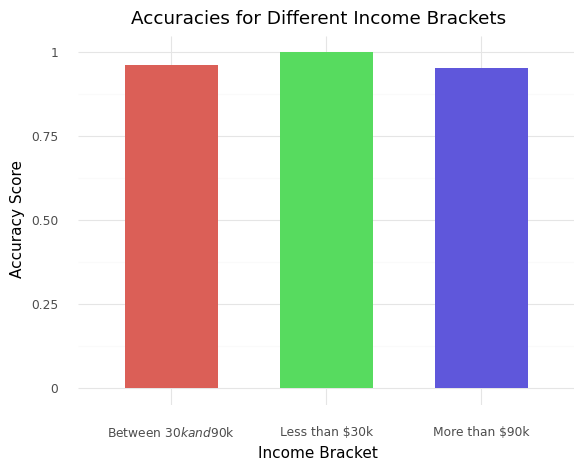

<ggplot: (8759113596637)>

In [21]:
# making new data frame to plot accuracy

income_bracket = ["Less than $30k","Between $30k and $90k","More than $90k"]
accuracies = [acc_score_less_than_30k,acc_score_between_30k_90k,acc_score_more_than_90k]

q3_DF = pd.DataFrame({"Income Bracket": income_bracket, "Accuracy Score": accuracies})

q3DF = q3_DF.sort_values(by = "Accuracy Score", ascending = True) # sorting the dataframe by accuracy score in ascending order
# q3DF
(ggplot(q3_DF, aes(x = "Income Bracket", y = "Accuracy Score", fill = "Income Bracket", show_legend = False)) +
 geom_bar(stat = "identity", width = 0.6) +
 theme_minimal() +
 labs(title = "Accuracies for Different Income Brackets") +
 theme(legend_position = "none")
)

#### My model is most accurate for those that make less than $30k each year.
#### My model may unfairly predict if someone is going to have a stroke better if they make less money than others.
#### If someone is in the highest income bracket, they are at a disadvantage because they are less likely to receive an accurate prediction of having a stroke.

### 4

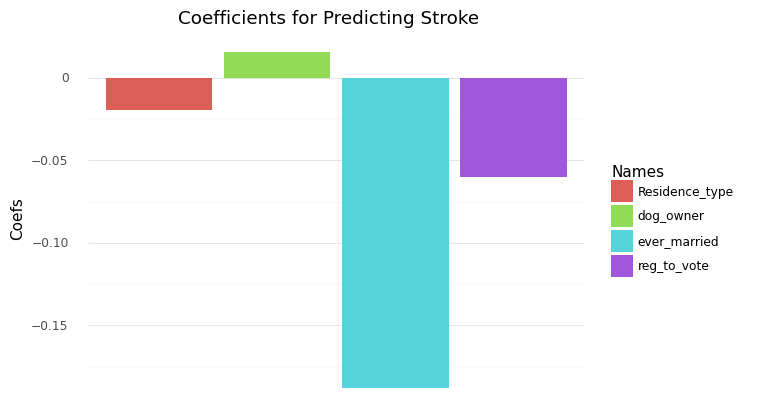

<ggplot: (8759111911869)>

In [22]:
4.
# Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)?
# How were you able to tell?

# coef.head(16)

# We already have a dataframe of the coefficients, so we simply need to grab the predictors we want, then plot the coefficients as a bar chart
# Let's grab the predictors that we would like to look at:

newCoef = coef.iloc[[10,5,4,0]]
# newCoef

# Plotting the coefficients in bar chart format
(ggplot(newCoef, aes(x = "Names", y = "Coefs", fill = "Names")) +
 geom_bar(stat = "identity") + 
 theme_minimal() + 
 theme(panel_grid_major_x = element_blank()) + 
 theme(axis_title_x = element_blank()) +
 theme(axis_text_x = element_blank()) +
 labs(title = "Coefficients for Predicting Stroke")
 )

#### Between the predictors of owning a dog, residence type, marriage, being registered to vote, the strongest predictor is marriage type.
#### This is because the coefficient in front of marriage type has the largest magnitude. As a note, we know that if someone has never been married, they are more likely to have a stroke when compared to someone who has been or currently is married.
#### It is easiest to predict if someone is to have a stroke based on whether or not they have ever been married.

### 5

In [23]:
# Create a variable er_visits_per_year that calculates the # of visits to the ER that a person has had per year of life. 
# Store this variable in your data frame (no need to include this variable in the previous logistic regression model). 
# Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

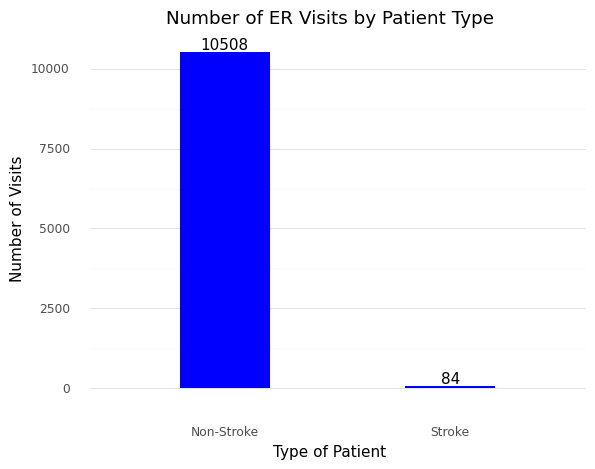

<ggplot: (8759111855801)>

In [24]:
er_visits_per_year = regular_StrokeDF["er_visits"] / regular_StrokeDF["age"] # creating an list of values for the number of ER visits per year for each person
regular_StrokeDF["er_visits_per_year"] = er_visits_per_year # adding the column to the Dataframe

q5_DF = regular_StrokeDF.groupby(["stroke"])[["er_visits_per_year"]].sum() # grouping the people by "stroke" factor variable and taking the sum of the ER visits for each type of person
non_stroke_visits = q5_DF.iloc[0,0] # grabbing the number of non-stroke visits
stroke_visits = q5_DF.iloc[1,0] # grabbing the number of stroke visits

num_er_visits = [non_stroke_visits, stroke_visits] # creating a list for the number of er visits for both types of patients
type_of_patient = ["Non-Stroke", "Stroke"]

q5_DF2 = pd.DataFrame({"Type of Patient": type_of_patient, "Number of Visits": num_er_visits})
q5_DF2.head()
(ggplot(q5_DF2, aes(x = "Type of Patient", y = "Number of Visits")) +
 geom_bar(stat = "identity", fill = "blue", width = 0.4) +
 theme_minimal() + 
 labs(title = "Number of ER Visits by Patient Type") +
 theme(panel_grid_major_x = element_blank()) +
 geom_text(mapping = aes(label="Number of Visits"), format_string = '{:.0f}', va = "bottom")
)

#### The number of ER visits for non-stroke patients is much higher than the number of ER visits for stroke patients. I can tell by grouping the data by the type of patient and summing the number of ER visits for each kind of person.

In [25]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/CPSC392/Project1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Project1.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g

MessageError: ignored